# Problems Notebook
Author: Myles Henehan
// Module: Applied Statistics


## Problem 1: Extending the Lady Tasting Tea

As always, let's start by importing our relevant libraries.

In [3]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

Original Experiment:

Before we extend the experiment to look at 12 cups of tea (4 with milk first), let's summarise the original experiment, where we had 8 cups, 4 using each method. We can then come back to this later when comparing.

Number of combinations: 70
Milk-first cups (random selection): [1, 2, 5, 6]
Overlap counts: (array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))


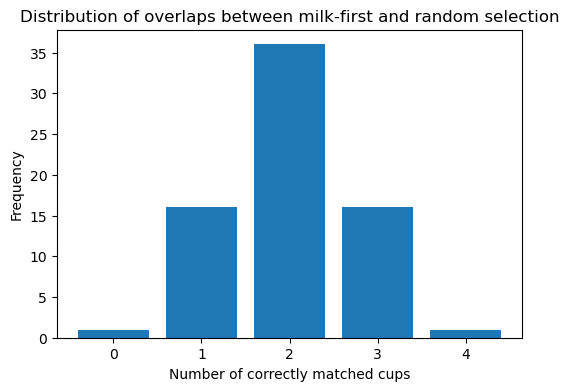

The probability of choosing 0 cups correctly is 0.0143
The probability of choosing 1 cups correctly is 0.2286
The probability of choosing 2 cups correctly is 0.5143
The probability of choosing 3 cups correctly is 0.2286
The probability of choosing 4 cups correctly is 0.0143


In [4]:
# Original Experiment
no_cups = 8
no_cups_milk_first = 4
no_cups_tea_first = 4

# No of ways of selecting k objects from n
no_possibilities = math.comb(no_cups, no_cups_milk_first)
print("Number of combinations:", no_possibilities)

# Randomly pick which cups get milk first
labels = list(range(no_cups))
labels_milk = random.sample(labels, no_cups_milk_first)
labels_milk.sort()
print("Milk-first cups (random selection):", labels_milk)

# All possible ways milk could be placed
combs = list(itertools.combinations(labels, no_cups_milk_first))
no_overlaps = []
for comb in combs:
    overlap = len(set(comb).intersection(labels_milk))
    no_overlaps.append(overlap)

# Count overlap frequencies
counts = np.unique(no_overlaps, return_counts=True)
print("Overlap counts:", counts)

# Plot distribution
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(counts[0], counts[1])
ax.set_xlabel("Number of correctly matched cups")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of overlaps between milk-first and random selection")
plt.show()

# Converted to probabilities (divide by 70):
probabilities = [(math.comb(4, k) * math.comb(4, 4-k)) / no_possibilities for k in range(5)]

# For each probability, print how likely it is to get k cups correct.
for k, p in enumerate(probabilities):
    print(f"The probability of choosing {k} cups correctly is {p:.4f}")


To extend the experiment, we will follow a similar method. Let's look first at what we have.

In [5]:
# Number of cups of tea in total.
no_cups_v2 = 12

# Number of cups of tea with milk in first.
no_cups_milk_first_v2 = 4

# Number of cups of tea with tea in first.
no_cups_tea_first_v2 = 8

In [6]:
no_possibilities_v2 = math.comb(no_cups_v2, no_cups_milk_first_v2)
print("Number of combinations:", no_possibilities_v2)

Number of combinations: 495


In [7]:
labels_v2 = list(range(no_cups_v2))
labels_milk_v2 = random.sample(labels_v2, no_cups_milk_first_v2)
labels_milk_v2.sort()
print("Milk-first cups (random selection):", labels_milk_v2)

Milk-first cups (random selection): [2, 3, 9, 11]


In [8]:
# All possible ways milk could be placed
combs_v2 = list(itertools.combinations(labels_v2, no_cups_milk_first_v2))
no_overlaps_v2 = []
for comb in combs_v2:
    overlap_v2 = len(set(comb).intersection(labels_milk_v2))
    no_overlaps_v2.append(overlap_v2)

In [9]:
# Count overlap frequencies
counts_v2 = np.unique(no_overlaps_v2, return_counts=True)
print("Overlap counts:", counts_v2)

Overlap counts: (array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))


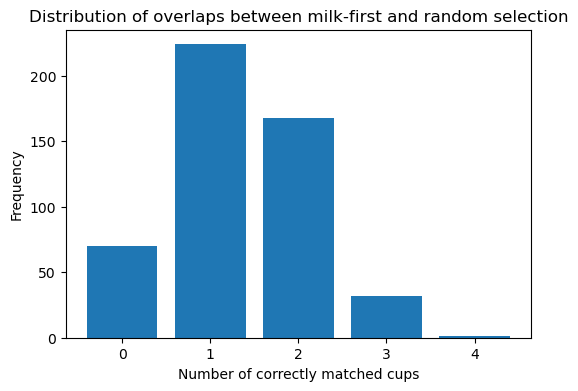

In [10]:
# Plot distribution
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(counts_v2[0], counts_v2[1])
ax.set_xlabel("Number of correctly matched cups")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of overlaps between milk-first and random selection")
plt.show()

In [11]:
# Converted to probabilities (divide by 70):
probabilities_v2 = [(math.comb(4, k) * math.comb(8, 4-k)) / no_possibilities_v2 for k in range(5)]

# For each probability, print how likely it is to get k cups correct.
for k, p in enumerate(probabilities_v2):
    print(f"The probability of choosing {k} cups correctly is {p:.4f}")

The probability of choosing 0 cups correctly is 0.1414
The probability of choosing 1 cups correctly is 0.4525
The probability of choosing 2 cups correctly is 0.3394
The probability of choosing 3 cups correctly is 0.0646
The probability of choosing 4 cups correctly is 0.0020


As we can see from above, the more cups the lady has to choose from, the fewer number of cups she will pick correctly (assuming the null hypothesis that this is random selection). Let's discuss this behaviour in more detail.

## Problem 2: Normal Distribution

Brief: Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

Let's start by generating the samples.

In [ ]:
# For these kinds of operations, Numpy will be the main library needed. This has already been run above, but let's assume each problem is being run separately.
import numpy as np
# Generate 100,000 samples, each of size 10.
# random() is the module within the NumPy library that generates pseudo-random numbers using a variety of methods (https://docs.python.org/3/library/random.html).
# within random() we have randn(), which is a function that generates samples from the standard normal distribution (https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)
samples = np.random.randn(100000, 10)